In [1]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [2]:
test_seed = 24
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural",thread=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,thread=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural",joblib=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear",joblib=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps",joblib=True,)
    points = l.gen_samples(num_ports) 
    return points


In [3]:
trials = 3
d_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()


run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_job, "natural job"),(linear_job,"linear job"),(mps_job,"mps job")]


for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n,seed = test_seed)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     




        natural    linear       mps  natural job  linear job   mps job
index                                                                 
50     0.016693  0.010047  0.010930     2.911062    0.009366  1.797935
100    0.025226  0.018905  0.019366     0.052736    0.018581  0.084703
200    0.042297  0.036774  0.037749     0.087604    0.036554  0.097945
500    0.094070  0.086235  0.092000     0.137533    0.088470  0.137063
1400   0.250196  0.238119  0.252133     0.292691    0.243227  0.258734
3500   0.619727  0.596387  0.632601     0.618809    0.604886  0.643538


In [4]:
comparse= [('mps','mps job'),('linear','linear job'),('natural','natural job')]


def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, comparse, d_list)
print(frame)

        natural    linear       mps  natural job  linear job   mps job  \
index                                                                    
50     0.016693  0.010047  0.010930     2.911062    0.009366  1.797935   
100    0.025226  0.018905  0.019366     0.052736    0.018581  0.084703   
200    0.042297  0.036774  0.037749     0.087604    0.036554  0.097945   
500    0.094070  0.086235  0.092000     0.137533    0.088470  0.137063   
1400   0.250196  0.238119  0.252133     0.292691    0.243227  0.258734   
3500   0.619727  0.596387  0.632601     0.618809    0.604886  0.643538   

       mps speed-up  linear speed-up  natural speed-up  
index                                                   
50         0.006079         1.072653          0.005734  
100        0.228631         1.017410          0.478350  
200        0.385407         1.006005          0.482819  
500        0.671222         0.974742          0.683982  
1400       0.974487         0.979002          0.854816  
3500    

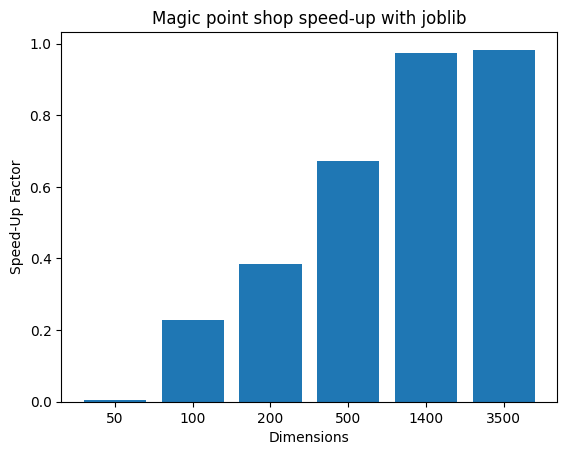

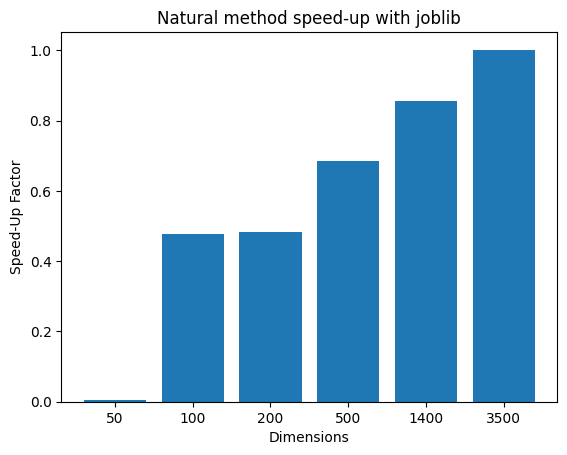

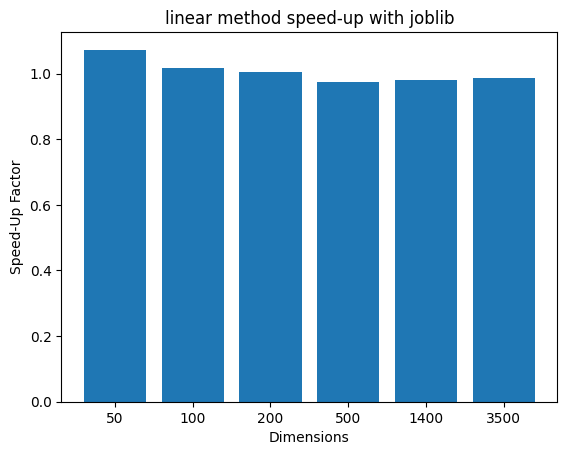

In [5]:
x = lambda array: [str(x) for x in array]

y_axis = frame["mps speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame["natural speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()

y_axis = frame["linear speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('linear method speed-up with joblib')
plt.show()


In [6]:
d = 10
p_list = [10, 100, 1000, 10_000, 15_000]
records = {'index':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('index')
names = set()



for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame2[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     
 
print(frame2) 

        natural    linear       mps  natural job  linear job   mps job
index                                                                 
10     0.007267  0.006077  0.007113     3.472484    0.004602  1.695587
100    0.033357  0.023634  0.021046     0.782208    0.025833  0.047652
1000   0.192105  0.180864  0.189809     0.227720    0.186210  0.209545
10000  2.424988  2.896239  2.544920     2.284496    2.993661  2.225160
15000  2.859253  2.911993  2.973921     2.649273    2.951173  2.642833


In [7]:



speed_up_cal(frame2, comparse, p_list)
print(frame2)


        natural    linear       mps  natural job  linear job   mps job  \
index                                                                    
10     0.007267  0.006077  0.007113     3.472484    0.004602  1.695587   
100    0.033357  0.023634  0.021046     0.782208    0.025833  0.047652   
1000   0.192105  0.180864  0.189809     0.227720    0.186210  0.209545   
10000  2.424988  2.896239  2.544920     2.284496    2.993661  2.225160   
15000  2.859253  2.911993  2.973921     2.649273    2.951173  2.642833   

       mps speed-up  linear speed-up  natural speed-up  
index                                                   
10         0.004195         1.320484          0.002093  
100        0.441654         0.914888          0.042644  
1000       0.905817         0.971293          0.843602  
10000      1.143702         0.967457          1.061498  
15000      1.125278         0.986724          1.079260  


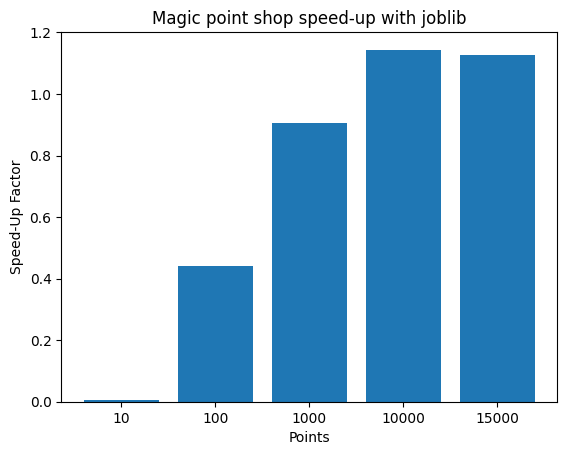

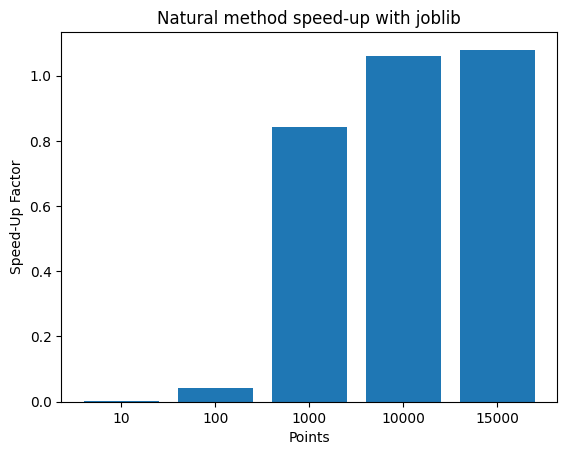

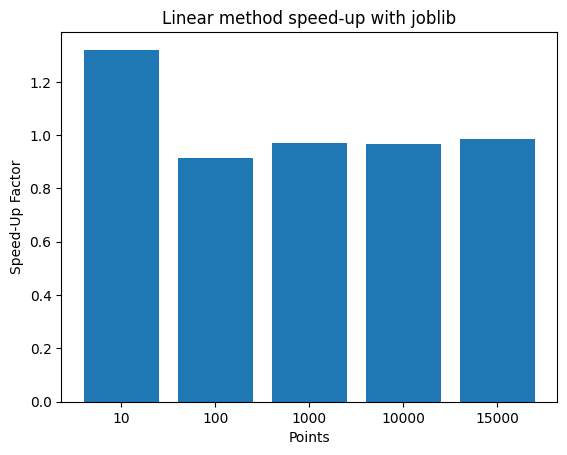

In [8]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["mps speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame2["natural speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()

y_axis = frame2["linear speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed-up with joblib')
plt.show()


